In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math
import matplotlib.patches as patches

In [4]:
"""Condensatore"""

R = 6730 #Ohm
C = 0.000000002056 #F
errVout = [0.04, 0.04, 0.01, 0.02, 0.008, 0.04, 0.004, 0.02, 0.02]  #Volt
errVin = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]  #Volt
errt = [0.000001, 0.0000004, 0.0000001, 0.0000002, 0.00000004, 0.000004, 0.00000004, 0.0000002, 0.0000002] #s
l = len(errVout)
F = [5000, 10000, 50000, 25000, 75000, 1000, 100000, 15000, 12000]
W = [(2*math.pi*F[i]) for i in range(l)]
Vin = [5.40, 5.40, 5.28, 5.32, 5.28, 5.32, 5.24, 5.4, 5.4]
Vout = [4.92, 3.90, 1.15, 2.20, 0.792, 5.20, 0.588, 3.14, 3.56]
A = [Vout[i]/Vin[i] for i in range(l)]
#x = [F[i]/(1/(R*C)) for i in range(l)]
t = [0.000014, 0.0000122, 0.0000043, 0.0000072, 0.00000308, 0.000020, 0.00000238, 0.000010, 0.000011]
phi = [-2*math.pi*t[i]/(1/F[i]) for i in range(l)]
print(A)





[0.911111111111111, 0.7222222222222222, 0.21780303030303028, 0.4135338345864662, 0.15, 0.9774436090225563, 0.11221374045801526, 0.5814814814814815, 0.6592592592592592]


In [7]:
"""Resistore"""
Vin1 = [5.32, 5.4, 5.4, 5.4, 5.4, 5.32, 5.28, 5.28, 5.24]
Vout1 = [0.456, 2.14, 3.34, 3.64, 3.96, 4.64, 4.92, 4.96, 5.00]
F1 = [1000, 5000, 10000, 12000, 15000, 25000, 50000, 75000, 100000]
A1 = [Vout1[i]/Vin1[i] for i in range(l)]
t1 = [0.000232, 0.000035, 0.0000136, 0.00001, 0.0000070, 0.000003, 0.0000008, 0.00000032, 0.00000004]
phi1 = [2*math.pi*t1[i]/(1/F1[i]) for i in range(l)]
print(phi1)

[1.457698991265664, 1.0995574287564276, 0.8545132017764238, 0.7539822368615504, 0.6597344572538565, 0.4712388980384689, 0.2513274122871834, 0.15079644737231007, 0.025132741228718343]


In [9]:
"""Grafico"""
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
#attenuazione
axes[0].scatter(F, A, label='Condensatore', color='blue')
axes[0].scatter(F1, A1, label='Resistore', color='red')
axes[0].set_title('Attenuazione')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].grid(True)
axes[0].set_xlabel("Frequenza (Hz)")
axes[0].set_ylabel("Attenuazione")
rect = patches.Rectangle(
    (9000, 0.55),           # angolo inferiore sinistro (x, y)
    20000 - 9000,          # larghezza
    0.8 - 0.5,             # altezza
    linewidth=2,
    edgecolor='red',
    facecolor='yellow',
    alpha=0.3              # trasparenza
)

axes[0].axhline(y=1/np.sqrt(2), color='red', linestyle='--', linewidth=1)

#fase
axes[1].scatter(F, phi, label='Condensatore', color='blue')
axes[1].scatter(F1, phi1, label='Resistore', color='red')
axes[1].set_title('Fase')
axes[1].legend()
axes[1].set_xscale('log')
axes[1].grid(True)

In [6]:
Freq = [5000, 10000, 12000, 15000, 25000]
indici1 = [1,2,3,4,5]
Ac = [0.91111111111,0.7222222222222,0.659259,0.581481,0.4135338]
errAc = [0.01019147863752532, 0.009280877302147928, 0.0048557741799479795, 0.005785497264727928, 0.00624646002034262]
#phic = [phi[i] for i in indici]
Ar = [A1[i] for i in indici1]
errAr=[ 0.0030607346600108193, 0.0059330338400214195, 0.006263666542176433, 0.006626995353027261, 0.009962448787324097]
#phir = [phi1[i] for i in indici]
print(Ac, Ar)


[0.91111111111, 0.7222222222222, 0.659259, 0.581481, 0.4135338] [0.3962962962962963, 0.6185185185185185, 0.674074074074074, 0.7333333333333333, 0.8721804511278194]


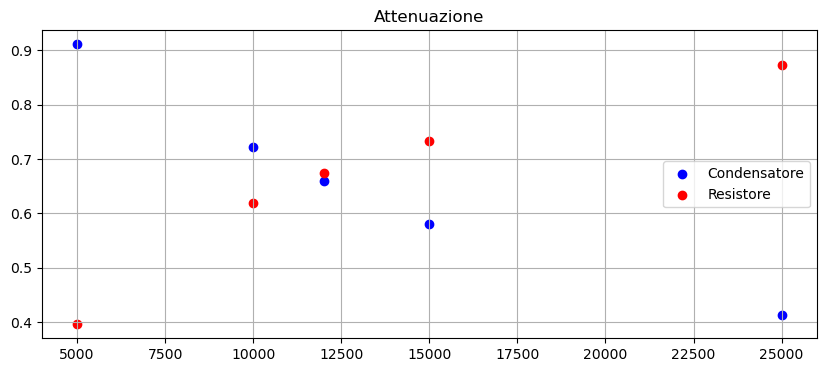

In [7]:
"""Grafico per il fit delle rette"""
figg, axess = plt.subplots(figsize=(10, 4))
#attenuazione
axess.scatter(Freq, Ac, label='Condensatore', color='blue')
axess.scatter(Freq, Ar, label='Resistore', color='red')
axess.set_title('Attenuazione')
axess.legend()
axess.grid(True)


In [8]:
#Fit resistore

def ret(x,a,b):
    return(a*x+b)
least_squares_r = LeastSquares(Freq[1:4], Ar[1:4], errAr[1:4], ret)
mr = Minuit(least_squares_r, a = 1/25000, b = 1 )
mr.migrad()
mr.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.573 (χ²/ndof = 1.6)      │              Nfcn = 70               │
│ EDM = 9.91e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  22.8e-6  │  1.8e-6   │  -1.8e-6   │   1.8e-6   │         │         │       │
│ 1 │ b    │   0.394   │   0.022   │   -0.022   │   0.022    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -1.8e-6  │  1.8e-6   │  -0.022   │   0.022   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────────────┐
│   │           a           b │
├───┼─────────────────────────┤
│ a │    3.16e-12 -38.3470e-9 │
│ b │ -38.3470e-9    0.000479 │
└───┴─────────────────────────┘

In [9]:
#Fit condensatore

least_squares_c = LeastSquares(Freq[1:4], Ac[1:4], errAc[1:4], ret)
mc = Minuit(least_squares_c, a = -1/25000, b = 1 )
mc.migrad()
mc.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.7415 (χ²/ndof = 0.7)     │              Nfcn = 64               │
│ EDM = 1.37e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ -27.3e-6  │  2.0e-6   │  -2.0e-6   │   2.0e-6   │         │         │       │
│ 1 │ b    │   0.989   │   0.025   │   -0.025   │   0.025    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -2e-6   │   2e-6    │  -0.025   │   0.025   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────────┐
│   │          a          b │
├───┼───────────────────────┤
│ a │   3.81e-12 -48.682e-9 │
│ b │ -48.682e-9   0.000635 │
└───┴───────────────────────┘

Text(0, 0.5, 'Attenuazione')

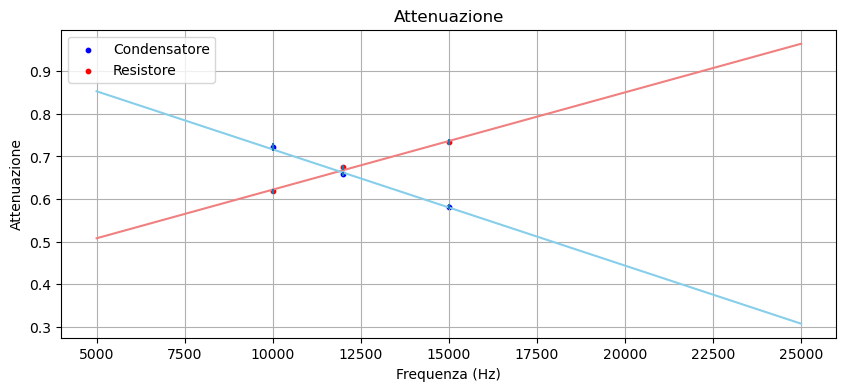

In [10]:
"""Grafico per l'intersezione delle rette"""
fi, ax = plt.subplots(figsize=(10, 4))
#attenuazione
ax.scatter(Freq[1:4], Ac[1:4], label='Condensatore', color='blue', s = 10)
ax.scatter(Freq[1:4], Ar[1:4], label='Resistore', color='red', s = 10)
ax.set_title('Attenuazione')
ax.legend()
ax.grid(True)
ax.plot([Freq[0], Freq[4]],[ret(Freq[0], mr.values['a'], mr.values['b']),ret(Freq[4], mr.values['a'], mr.values['b'])], color = 'lightcoral')
ax.plot([Freq[0], Freq[4]],[ret(Freq[0], mc.values['a'], mc.values['b']),ret(Freq[4], mc.values['a'], mc.values['b'])], color = 'skyblue')
ax.errorbar(Freq[1:4], Ac[1:4], yerr=errAc[1:4], fmt = 'none')
ax.errorbar(Freq[1:4], Ar[1:4], yerr=errAr[1:4], fmt = 'none')
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Attenuazione")


In [11]:
vt = (mr.values['b']-mc.values['b'])/(mc.values['a']-mr.values['a'])
vt

11884.692304292637

In [12]:
e_a_res = mr.errors['a']
e_a_cond = mc.errors['a']
e_b_res = mr.errors['b']
e_b_cond = mc.errors['b']
cov_res = mr.covariance[('a', 'b')]
cov_cond = mc.covariance[('a', 'b')]


delfina = (((mr.values['b']-mc.values['b'])/((mc.values['a']-mr.values['a'])**2))**2)*(e_a_res**2+e_a_cond**2)
diego = ((1/(mc.values['a']-mr.values['a']))**2)*(e_b_res**2+e_b_cond**2)
claudio = 2*((mr.values['b']-mc.values['b'])/((mc.values['a']-mr.values['a'])**3))*(cov_res+cov_cond)

errvt = delfina + diego + claudio 
print(errvt**0.5)

106.11883916785087
